# Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.5f' % x)


# Read Dataset

In [2]:
df = pd.read_csv("USA_Housing.csv")

# Data Preparation

In [3]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.68286,7.00919,4.09000,23086.80050,1059033.55787,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.00290,6.73082,3.09000,40173.07217,1505890.91485,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.86589,8.51273,5.13000,36882.15940,1058987.98788,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.18824,5.58673,3.26000,34310.24283,1260616.80663,USS Barnett\nFPO AP 44820
4,59982.19723,5.04055,7.83939,4.23000,26354.10947,630943.48934,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.83036,6.13736,3.46000,22837.36103,1060193.78588,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.99913,6.57676,4.02000,25616.11549,1482617.72862,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.25059,4.80508,2.13000,33266.14549,1030729.58315,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.53439,7.13014,5.44000,42625.62016,1198656.87241,USS Wallace\nFPO AE 73316


In [4]:
df.shape

(5000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.68286,7.00919,4.09000,23086.80050,1059033.55787,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.00290,6.73082,3.09000,40173.07217,1505890.91485,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.86589,8.51273,5.13000,36882.15940,1058987.98788,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.18824,5.58673,3.26000,34310.24283,1260616.80663,USS Barnett\nFPO AP 44820
4,59982.19723,5.04055,7.83939,4.23000,26354.10947,630943.48934,USNS Raymond\nFPO AE 09386
5,80175.75416,4.98841,6.10451,4.04000,26748.42842,1068138.07439,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.46343,6.02534,8.14776,3.41000,60828.24909,1502055.81737,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.33928,6.98978,6.62048,2.42000,36516.35897,1573936.56448,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.66081,5.36213,6.39312,2.30000,29387.39600,798869.53283,USS Gilbert\nFPO AA 20957
9,81885.92718,4.42367,8.16769,6.10000,40149.96575,1545154.81264,Unit 9446 Box 0958\nDPO AE 97025


In [8]:
df.columns = df.columns.str.replace('.', '_')
df.columns = df.columns.str.replace(" ","_")

In [9]:
df["Income"]=df.Avg__Area_Income
df["Age"]=df.Avg__Area_House_Age
df["Rooms"]=df.Avg__Area_Number_of_Rooms
df["Bedrooms"]=df.Avg__Area_Number_of_Bedrooms
df["Population"]=df.Area_Population

In [10]:
df= df.drop(columns={"Avg__Area_Income","Avg__Area_House_Age","Avg__Area_Number_of_Rooms","Avg__Area_Number_of_Bedrooms","Area_Population","Address"})

In [11]:
df

,Price,Income,Age,Rooms,Bedrooms,Population
0,1059033.55787,79545.45857,5.68286,7.00919,4.09000,23086.80050
1,1505890.91485,79248.64245,6.00290,6.73082,3.09000,40173.07217
2,1058987.98788,61287.06718,5.86589,8.51273,5.13000,36882.15940
3,1260616.80663,63345.24005,7.18824,5.58673,3.26000,34310.24283
4,630943.48934,59982.19723,5.04055,7.83939,4.23000,26354.10947
...,...,...,...,...,...,...
4995,1060193.78588,60567.94414,7.83036,6.13736,3.46000,22837.36103
4996,1482617.72862,78491.27543,6.99913,6.57676,4.02000,25616.11549
4997,1030729.58315,63390.68689,7.25059,4.80508,2.13000,33266.14549
4998,1198656.87241,68001.33124,5.53439,7.13014,5.44000,42625.62016


In [12]:
df.describe()

,Price,Income,Age,Rooms,Bedrooms,Population
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,1232072.65414,68583.10898,5.97722,6.98779,3.98133,36163.51604
std,353117.62658,10657.99121,0.99146,1.00583,1.23414,9925.65011
min,15938.65792,17796.63119,2.64430,3.23619,2.00000,172.61069
25%,997577.13505,61480.56239,5.32228,6.29925,3.14000,29403.92870
50%,1232669.37797,68804.28640,5.97043,7.00290,4.05000,36199.40669
75%,1471210.20421,75783.33867,6.65081,7.66587,4.49000,42861.29077
max,2469065.59417,107701.74838,9.51909,10.75959,6.50000,69621.71338


# Visulazations

In [13]:
import missingno as msno

<AxesSubplot:>

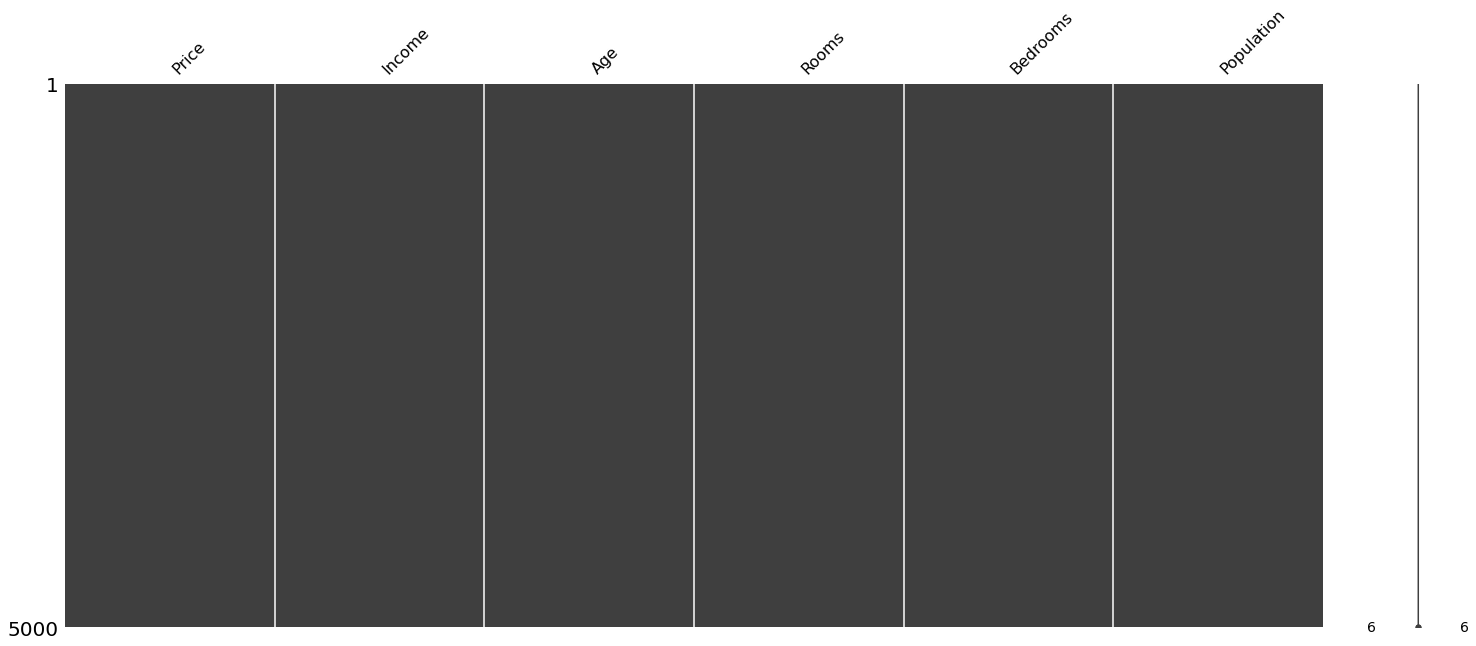

In [14]:
msno.matrix(df)

<AxesSubplot:>

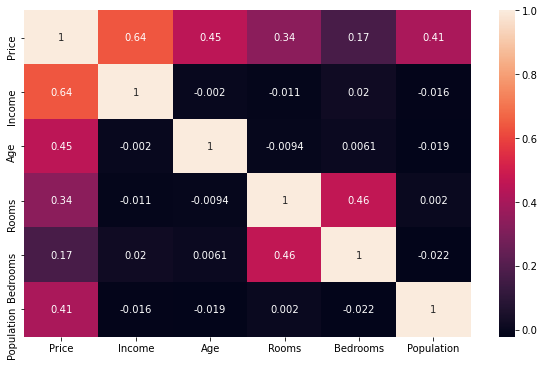

In [15]:
sns.heatmap(df.corr(),annot=True)

# Statistical Analysis

In [16]:
def check_dist(df,var):
    plt.subplot(1,2,1)
    sns.histplot(x=var,data=df)
    plt.subplot(1,2,2)
    stats.probplot(df[var],dist = "norm",plot=plt) 
    plt.show()

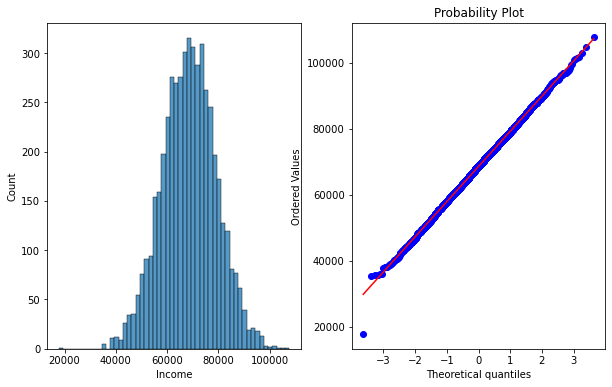

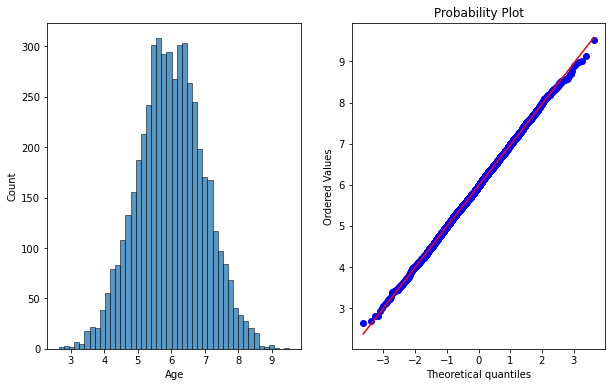

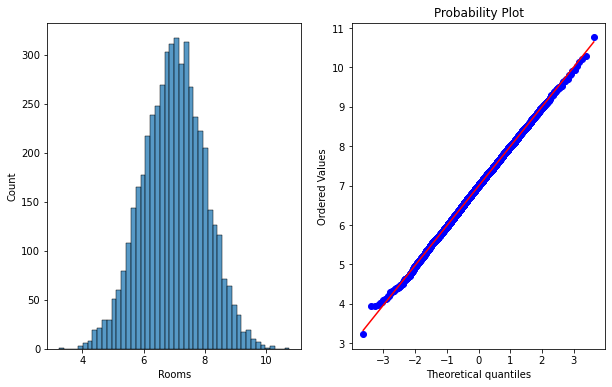

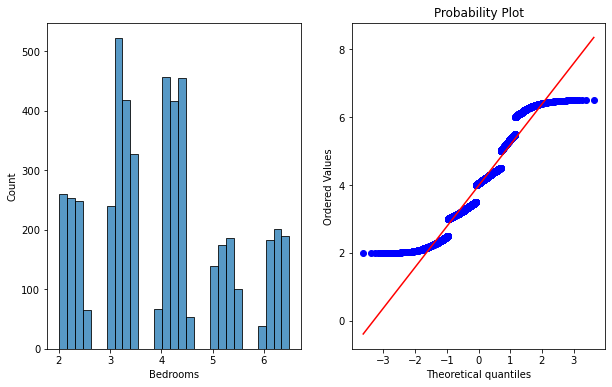

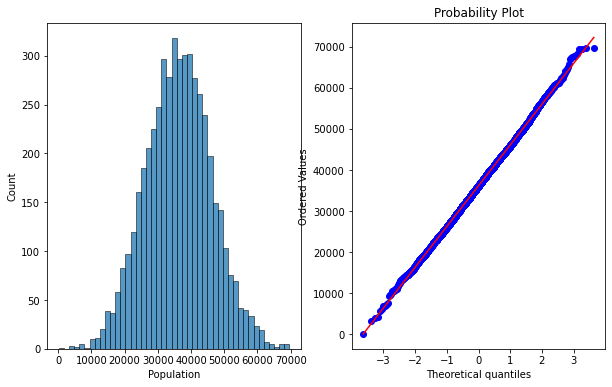

In [17]:
for col in df.drop(["Price"],axis=1).columns:
    check_dist(df,col)

# Determine Dependent and Independent Variables

In [18]:
y=df["Price"]
X=df.drop(["Price"],axis=1)

In [19]:
print(X,y)

          Income     Age   Rooms  Bedrooms  Population
0    79545.45857 5.68286 7.00919   4.09000 23086.80050
1    79248.64245 6.00290 6.73082   3.09000 40173.07217
2    61287.06718 5.86589 8.51273   5.13000 36882.15940
3    63345.24005 7.18824 5.58673   3.26000 34310.24283
4    59982.19723 5.04055 7.83939   4.23000 26354.10947
...          ...     ...     ...       ...         ...
4995 60567.94414 7.83036 6.13736   3.46000 22837.36103
4996 78491.27543 6.99913 6.57676   4.02000 25616.11549
4997 63390.68689 7.25059 4.80508   2.13000 33266.14549
4998 68001.33124 5.53439 7.13014   5.44000 42625.62016
4999 65510.58180 5.99231 6.79234   4.07000 46501.28380

[5000 rows x 5 columns] 0      1059033.55787
1      1505890.91485
2      1058987.98788
3      1260616.80663
4       630943.48934
            ...     
4995   1060193.78588
4996   1482617.72862
4997   1030729.58315
4998   1198656.87241
4999   1298950.48027
Name: Price, Length: 5000, dtype: float64


# LINEAR REGRESSION

In [190]:
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler()

In [194]:
scaler.fit(X)

StandardScaler()

In [195]:
X = scaler.transform(X)
X

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [196]:
Xl=pd.DataFrame(X,columns=["0","1","2","3","4"])

In [197]:
Xl["Total"]=Xl["0"]+Xl["1"]+Xl["2"]+Xl["3"]+Xl["4"]

In [198]:
Xl=Xl.drop(["0","1","2","3","4"],axis=1)

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(Xl, y, test_size=0.3, random_state=101)

In [201]:
X_train

,Total
2654,1.71319
2468,-2.27644
290,4.05730
1463,-1.80837
4508,-1.63346
...,...
4171,-3.33180
599,1.16240
1361,-2.23573
1547,-1.88053


In [202]:
X_test

,Total
1718,0.70828
2511,-0.43275
345,2.79738
2521,-1.24166
54,0.31850
...,...
3412,-2.22654
4020,-0.57692
4635,0.07276
1700,-5.13290


In [203]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)
eval_metrics(y_train,y_train_pred)

Model testing performance
-------------------------
R2_score 	: 0.690524933658665
MAE 		: 158295.414337539
MSE 		: 38550330214.6668
RMSE 		: 196342.38007793122


In [204]:
eval_metrics(y_test, y_pred) 

Model testing performance
-------------------------
R2_score 	: 0.6959344380502603
MAE 		: 155674.96396358148
MSE 		: 37942480019.09532
RMSE 		: 194788.29538526005


In [207]:
lm_scores = {"slm_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                         "mae" : mean_absolute_error(y_train, y_train_pred),
                         "mse": mean_squared_error(y_train,y_train_pred),
                         "R2" : r2_score(y_train, y_train_pred)},
            "slm_test": {"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                         "mae" : mean_absolute_error(y_test, y_pred),
                         "mse": mean_squared_error(y_test,y_pred),
                         "R2" : r2_score(y_test, y_pred)}}
ls = pd.DataFrame(lm_scores)

# POLİNOMİAL REGRESSION MODEL

# Scaling the Data

In [20]:
from sklearn.preprocessing import PolynomialFeatures
polinomial_converter = PolynomialFeatures(degree = 5, include_bias =False) 
poly_features = polinomial_converter.fit_transform(X)

In [21]:
poly_features

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, ...,
        2.05843836e+14, 1.16192557e+18, 6.55871487e+21],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, ...,
        6.19044820e+14, 8.04819813e+18, 1.04634577e+23],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, ...,
        1.32033383e+15, 9.49254636e+18, 6.82467072e+22],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, ...,
        1.67019298e+14, 2.60849215e+18, 4.07391922e+22],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, ...,
        2.29197529e+15, 1.79589831e+19, 1.40719263e+23],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, ...,
        1.66564961e+15, 1.90306745e+19, 2.17432628e+23]])

In [24]:
from sklearn.preprocessing import StandardScaler

In [27]:
poly_features.shape

(5000, 251)

In [26]:
scaler = StandardScaler()

In [28]:
scaler.fit(poly_features)
poly_features

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, ...,
        2.05843836e+14, 1.16192557e+18, 6.55871487e+21],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, ...,
        6.19044820e+14, 8.04819813e+18, 1.04634577e+23],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, ...,
        1.32033383e+15, 9.49254636e+18, 6.82467072e+22],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, ...,
        1.67019298e+14, 2.60849215e+18, 4.07391922e+22],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, ...,
        2.29197529e+15, 1.79589831e+19, 1.40719263e+23],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, ...,
        1.66564961e+15, 1.90306745e+19, 2.17432628e+23]])

In [29]:
poly_features = scaler.transform(poly_features)
poly_features

array([[ 1.02865969, -0.29692705,  0.02127433, ..., -0.75146709,
        -0.78819003, -0.68851944],
       [ 1.00080775,  0.02590164, -0.25550611, ..., -0.35782596,
        -0.17001256, -0.06226607],
       [-0.68462916, -0.11230283,  1.5162435 , ...,  0.31026586,
        -0.04035409, -0.29461709],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, ..., -0.78845378,
        -0.65833243, -0.47026351],
       [-0.05459152, -0.44669439,  0.14154061, ...,  1.23591234,
         0.71967399,  0.16814899],
       [-0.28831272,  0.01521477, -0.19434166, ...,  0.63923529,
         0.81587923,  0.65799432]])

# Train - Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [32]:
X_train

array([[ 1.69915465,  0.28514338, -0.30975079, ..., -0.17975358,
         0.06150084,  0.16436144],
       [-0.81788705, -0.10782412, -1.08250987, ..., -0.40406232,
        -0.49774254, -0.51396973],
       [ 0.5432176 ,  0.59025915,  1.18989741, ...,  0.60554534,
        -0.10146906, -0.42627708],
       ...,
       [-1.21622414, -2.26082045, -0.11881994, ...,  0.3236768 ,
         2.39830931,  5.70009834],
       [-0.51972297, -0.04232647, -1.06821454, ..., -0.38631608,
        -0.47036548, -0.49073436],
       [ 0.60952689,  1.68209486,  1.44465262, ...,  2.21418818,
         2.97088895,  2.83310063]])

In [33]:
X_test

array([[-0.16966556, -0.26234629,  0.80282069, ..., -0.06232919,
        -0.18212701, -0.30009415],
       [-0.60041423, -1.0606313 ,  0.43738986, ..., -0.29914705,
        -0.63700913, -0.65441083],
       [ 0.47480377,  0.79651541,  1.34160257, ..., -0.09360382,
         0.14714874,  0.22503217],
       ...,
       [-0.81838584,  2.13816242, -0.72163424, ..., -0.53300136,
        -0.04635757,  0.57324269],
       [-0.89640643,  0.1819757 , -1.67737759, ..., -0.88987189,
        -0.83764096, -0.69103017],
       [-0.38250422,  0.41093355,  0.56042473, ...,  1.56509315,
         0.72710265,  0.05764365]])

In [34]:
pd.DataFrame(X_train).agg(["mean","std"]).round()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
mean,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,...,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [35]:
pd.DataFrame(X_test).agg(["mean","std"]).round()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
mean,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


## Model Fitting and Compare Actual and Predicted Labels

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = lm.predict(X_test)

In [39]:
y_pred

array([1267468.19016029,  851155.93685426, 1763011.63742932, ...,
       1437687.85467642,  643922.21930261, 1358235.47428799])

## Error Metrics

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
def eval_metrics(actual,pred):
    mae = mean_absolute_error(actual,pred)
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance")
    print("-------------------------")
    print(f'R2_score \t: {R2_score}')
    print(f'MAE \t\t: {mae}')
    print(f'MSE \t\t: {mse}')
    print(f'RMSE \t\t: {rmse}')

In [42]:
y_train_pred = lm.predict(X_train)

In [43]:
y_train_pred

array([1714255.66172409,  829415.66145669, 1572958.00063505, ...,
       1040756.97927827,  922230.74143054, 2054346.52581934])

In [44]:
eval_metrics(y_train,y_train_pred)

Model testing performance
-------------------------
R2_score 	: 0.923444547624189
MAE 		: 78525.06702034158
MSE 		: 9536270574.914904
RMSE 		: 97653.83031358731


In [45]:
eval_metrics(y_test, y_pred) 

Model testing performance
-------------------------
R2_score 	: 0.9055004836473171
MAE 		: 86256.85206320649
MSE 		: 11792016129.79281
RMSE 		: 108591.04995252975


## Evaluate Model

In [185]:
mlm_scores = {"lm_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                         "mae" : mean_absolute_error(y_train, y_train_pred),
                         "mse": mean_squared_error(y_train,y_train_pred),
                         "R2" : r2_score(y_train, y_train_pred)},
            "lm_test": {"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                         "mae" : mean_absolute_error(y_test, y_pred),
                         "mse": mean_squared_error(y_test,y_pred),
                         "R2" : r2_score(y_test, y_pred)}}
mls = pd.DataFrame(lm_scores)

In [186]:
mls

,lm_train,lm_test
rmse,97653.83031,108591.04995
mae,78525.06702,86256.85206
mse,9536270574.91490,11792016129.79281
R2,0.92344,0.90550


# Improve Model 
    * Use Cross Validate
    * Use Ridge Regression
    * Use Lasso Regression
    * Use Elasticnet Regression
    * Use Grid-Search

In [48]:
from sklearn.metrics import SCORERS

In [49]:
from sklearn.model_selection import cross_validate, cross_val_score

In [50]:
model = LinearRegression()

In [51]:
scores = cross_validate(model, X_train, y_train, scoring = ["r2","neg_median_absolute_error","neg_mean_squared_error",\
                                                            "neg_root_mean_squared_error"], cv=10)

In [52]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_median_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.14890,0.00400,0.85773,-70502.44504,-17061779475.25991,-130620.74673
2,0.13692,0.00400,0.91568,-75823.39557,-10930131164.54037,-104547.26761
3,0.13991,0.00699,0.91250,-75134.59474,-11418780993.46019,-106858.69639
4,0.15690,0.00800,0.90450,-79495.69049,-11713965988.54655,-108231.07682
5,0.19388,0.00700,0.89637,-73313.98143,-12409209373.00033,-111396.63089
6,0.16790,0.00500,0.89398,-75234.13535,-14081586555.27822,-118665.86095
7,0.16790,0.00700,0.88736,-72989.98908,-14273809879.06914,-119473.05085
8,0.15291,0.00700,0.89172,-73100.56531,-13541621334.15049,-116368.47225
9,0.16689,0.00600,0.89698,-75272.53420,-11971589819.54496,-109414.76052
10,0.16690,0.00500,0.91892,-67419.91635,-9713058741.86005,-98554.85144


In [53]:
scores = pd.DataFrame(scores,index= range(1,11))  
scores.iloc[:,2:].mean()

test_r2                                       0.89757
test_neg_median_absolute_error           -73828.72476
test_neg_mean_squared_error        -12711553332.47102
test_neg_root_mean_squared_error        -112413.14144
dtype: float64

In [54]:
eval_metrics(y_test,y_pred)

Model testing performance
-------------------------
R2_score 	: 0.9055004836473171
MAE 		: 86256.85206320649
MSE 		: 11792016129.79281
RMSE 		: 108591.04995252975


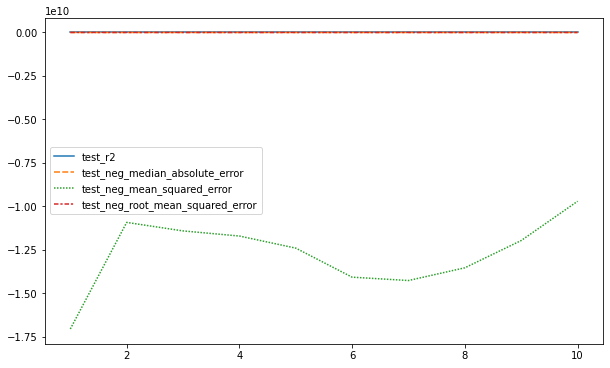

In [55]:
sns.lineplot(data=scores.iloc[:,2:]);

In [187]:
lm.coef_

array([-2.94118898e+06, -1.88941435e+07, -2.97122415e+06,  4.57160663e+07,
       -1.12292365e+07,  2.91105217e+06,  2.35624038e+07,  1.62294750e+07,
       -3.40630281e+07, -1.30464760e+06,  7.58730899e+07,  2.55564543e+07,
       -7.21563026e+07,  6.54361160e+05, -9.27247150e+06, -8.58123916e+07,
        5.46541889e+07, -8.38952759e+06, -2.44881474e+07,  1.55234596e+07,
       -7.86694138e+06,  7.31567657e+06, -2.08832481e+07,  8.51477972e+06,
        1.80848604e+07, -6.84934688e+07, -4.73090570e+07,  6.26331278e+07,
        5.57247592e+06,  5.99030964e+06,  6.88492706e+07, -5.03825316e+07,
       -3.65003019e+07,  1.75865647e+07,  4.52111240e+06, -7.11667610e+07,
       -5.43905049e+07,  2.96711688e+07, -6.67522019e+06, -3.50345457e+06,
        9.50288327e+07, -3.05567602e+07,  8.74784243e+06,  4.13475575e+07,
        2.43467666e+06,  1.90250756e+07,  5.04179355e+07, -4.56667587e+07,
        7.33666461e+06,  2.11292977e+07, -3.74409094e+07,  2.51105950e+07,
        7.43594946e+06, -

In [57]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-2941188.97852
1,-18894143.53005
2,-2971224.15483
3,45716066.29054
4,-11229236.50035
...,...
246,3225352.93695
247,-133550.41157
248,831598.26766
249,63958.38326


# Ridge Model

In [58]:
from sklearn.linear_model import Ridge

In [59]:
ridge_model = Ridge(alpha =1 )

In [60]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=1)

In [61]:
y_pred = ridge_model.predict(X_test)

In [62]:
y_pred

array([1254897.26005654,  832336.00445543, 1753508.00563103, ...,
       1470599.91933342,  648382.25094738, 1359357.99542982])

In [63]:
eval_metrics(y_test, y_pred)

Model testing performance
-------------------------
R2_score 	: 0.9165395923553323
MAE 		: 82104.0867359621
MSE 		: 10414513334.35382
RMSE 		: 102051.52293990433


In [64]:
y_train_pred = ridge_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance
-------------------------
R2_score 	: 0.9193250916884836
MAE 		: 80667.3224442017
MSE 		: 10049418171.92053
RMSE 		: 100246.7863421094


In [65]:
ridge_scores = {"ridge_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                         "mae" : mean_absolute_error(y_train, y_train_pred),
                         "mse": mean_squared_error(y_train,y_train_pred),
                         "R2" : r2_score(y_train, y_train_pred)},
            "ridge_test": {"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                         "mae" : mean_absolute_error(y_test, y_pred),
                         "mse": mean_squared_error(y_test,y_pred),
                         "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,100246.78634,102051.52294
mae,80667.32244,82104.08674
mse,10049418171.92053,10414513334.35382
R2,0.91933,0.91654


In [188]:
pd.concat([mls,rs],axis=1)

,lm_train,lm_test,ridge_train,ridge_test
rmse,97653.83031,108591.04995,100246.78634,102051.52294
mae,78525.06702,86256.85206,80667.32244,82104.08674
mse,9536270574.91490,11792016129.79281,10049418171.92053,10414513334.35382
R2,0.92344,0.90550,0.91933,0.91654


In [67]:
model = Ridge(alpha = 1)
scores = cross_validate(model,X_train, y_train, scoring = ["r2","neg_mean_absolute_error",
                                                          "neg_mean_squared_error",
                                                           "neg_root_mean_squared_error"], cv=10)

In [68]:
scores = pd.DataFrame(scores, index = range(1,11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.90359,-86140.31615,-11562217442.23021,-107527.75196
2,0.92086,-81862.59356,-10257707421.44883,-101280.34075
3,0.91892,-85128.23642,-10581774289.01598,-102867.75145
4,0.91497,-83823.05245,-10428964224.86223,-102122.30033
5,0.91310,-82177.65692,-10405682008.65845,-102008.24481
6,0.91778,-83333.79368,-10921207864.27597,-104504.58298
7,0.91974,-80580.27148,-10170550640.07051,-100849.14794
8,0.91081,-83722.48240,-11153584935.70542,-105610.53421
9,0.90953,-81318.81255,-10513432519.20187,-102535.03069
10,0.92716,-75613.57075,-8725773713.10840,-93411.84996


<AxesSubplot:>

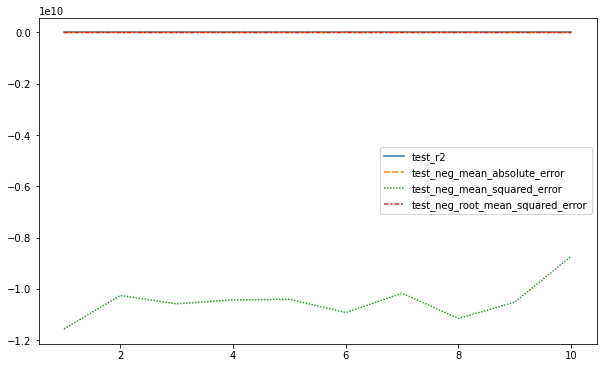

In [69]:
sns.lineplot(data=scores.iloc[:,2:])

In [70]:
pd.DataFrame(scores, index=range(1,11)).iloc[:,2:].mean()

test_r2                                       0.91565
test_neg_mean_absolute_error             -82370.07864
test_neg_mean_squared_error        -10472089505.85778
test_neg_root_mean_squared_error        -102271.75351
dtype: float64

In [71]:
eval_metrics(y_test,y_pred)

Model testing performance
-------------------------
R2_score 	: 0.9165395923553323
MAE 		: 82104.0867359621
MSE 		: 10414513334.35382
RMSE 		: 102051.52293990433


In [72]:
ridge_model.coef_ 

array([ 9.99097611e+04,  8.41065967e+03,  3.24432303e+04, -9.62185616e+03,
        3.85439739e+04,  6.18984337e+04,  9.19739249e+03,  4.20862543e+04,
        7.66189058e+03,  6.10530811e+04,  3.46616845e+04,  5.95471539e+04,
       -1.89375245e+04, -2.23998443e+03, -3.01410162e+03, -4.84914715e+01,
        2.00874305e+04,  2.29431141e+04,  8.02946394e+03,  3.01185574e+04,
        6.21246306e+03,  1.22039488e+04,  8.43617603e+03,  1.05244374e+04,
        6.82594507e+04, -8.30701182e+03,  3.58063505e+04, -3.04102147e+03,
       -1.65695838e+04,  1.45820517e+03,  7.20181674e+03,  2.88778128e+04,
       -2.62359428e+01, -3.49301534e+04, -8.09697738e+03,  4.71739557e+04,
        7.02884873e+04,  1.14466570e+03, -1.29953719e+04,  1.45422786e+04,
       -5.46116015e+03,  2.25131659e+04,  1.01714779e+03,  1.42542993e+04,
        2.25211249e+04, -1.33213923e+04, -9.86554340e+03, -2.36807965e+04,
        1.52289969e+04,  1.20711820e+04,  2.41253406e+03,  1.88481384e+04,
       -7.75638606e+03,  

In [74]:
rm_df = pd.DataFrame(ridge_model.coef_, columns=["ridge_coef_1"])

In [75]:
pd.concat([lm_df,rm_df], axis=1)

,lm_coef,ridge_coef_1
0,-2941188.97852,99909.76114
1,-18894143.53005,8410.65967
2,-2971224.15483,32443.23026
3,45716066.29054,-9621.85616
4,-11229236.50035,38543.97387
...,...,...
246,3225352.93695,41886.34446
247,-133550.41157,5562.15449
248,831598.26766,-37367.56730
249,63958.38326,-30809.27943


# Ridge CV

In [76]:
from sklearn.linear_model import RidgeCV

In [77]:
alpha_space = np.linspace(0.01,1,100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [78]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv=10, scoring="neg_root_mean_squared_error")

In [79]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [80]:
ridge_cv_model.alpha_

1.0

In [81]:
y_pred = ridge_cv_model.predict(X_test)

In [82]:
eval_metrics(y_test,y_pred)

Model testing performance
-------------------------
R2_score 	: 0.9165395923553323
MAE 		: 82104.0867359621
MSE 		: 10414513334.35382
RMSE 		: 102051.52293990433


In [83]:
y_train_pred = ridge_cv_model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance
-------------------------
R2_score 	: 0.9193250916884836
MAE 		: 80667.3224442017
MSE 		: 10049418171.92053
RMSE 		: 100246.7863421094


In [84]:
ridge_cv_scores = {"ridge_cv_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                         "mae" : mean_absolute_error(y_train, y_train_pred),
                         "mse": mean_squared_error(y_train,y_train_pred),
                         "R2" : r2_score(y_train, y_train_pred)},
            "ridge_cv_test": {"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                         "mae" : mean_absolute_error(y_test, y_pred),
                         "mse": mean_squared_error(y_test,y_pred),
                         "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,100246.78634,102051.52294
mae,80667.32244,82104.08674
mse,10049418171.92053,10414513334.35382
R2,0.91933,0.91654


In [189]:
pd.concat([mls,rs,rcs],axis=1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
rmse,97653.83031,108591.04995,100246.78634,102051.52294,100246.78634,102051.52294
mae,78525.06702,86256.85206,80667.32244,82104.08674,80667.32244,82104.08674
mse,9536270574.91490,11792016129.79281,10049418171.92053,10414513334.35382,10049418171.92053,10414513334.35382
R2,0.92344,0.90550,0.91933,0.91654,0.91933,0.91654


In [86]:
ridge_cv_model.coef_

array([ 9.99097611e+04,  8.41065967e+03,  3.24432303e+04, -9.62185616e+03,
        3.85439739e+04,  6.18984337e+04,  9.19739249e+03,  4.20862543e+04,
        7.66189058e+03,  6.10530811e+04,  3.46616845e+04,  5.95471539e+04,
       -1.89375245e+04, -2.23998443e+03, -3.01410162e+03, -4.84914715e+01,
        2.00874305e+04,  2.29431141e+04,  8.02946394e+03,  3.01185574e+04,
        6.21246306e+03,  1.22039488e+04,  8.43617603e+03,  1.05244374e+04,
        6.82594507e+04, -8.30701182e+03,  3.58063505e+04, -3.04102147e+03,
       -1.65695838e+04,  1.45820517e+03,  7.20181674e+03,  2.88778128e+04,
       -2.62359428e+01, -3.49301534e+04, -8.09697738e+03,  4.71739557e+04,
        7.02884873e+04,  1.14466570e+03, -1.29953719e+04,  1.45422786e+04,
       -5.46116015e+03,  2.25131659e+04,  1.01714779e+03,  1.42542993e+04,
        2.25211249e+04, -1.33213923e+04, -9.86554340e+03, -2.36807965e+04,
        1.52289969e+04,  1.20711820e+04,  2.41253406e+03,  1.88481384e+04,
       -7.75638606e+03,  

In [87]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_,columns=["Ridge_cv_coef_0.99"])

In [183]:
pd.concat([lm_df,rm_df,rcm_df], axis=1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.99
0,-2941188.97852,99909.76114,99909.76114
1,-18894143.53005,8410.65967,8410.65967
2,-2971224.15483,32443.23026,32443.23026
3,45716066.29054,-9621.85616,-9621.85616
4,-11229236.50035,38543.97387,38543.97387
...,...,...,...
246,3225352.93695,41886.34446,41886.34446
247,-133550.41157,5562.15449,5562.15449
248,831598.26766,-37367.56730,-37367.56730
249,63958.38326,-30809.27943,-30809.27943


# LASSO

In [89]:
from sklearn.linear_model import Lasso, LassoCV

In [90]:
lasso_model = Lasso(alpha=1)

In [91]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [92]:
y_train_pred = lasso_model.predict(X_train)

In [93]:
y_train_pred

array([1729631.91931109,  830746.65937201, 1572735.08659554, ...,
       1047930.53884368,  922296.44250397, 2139432.84603338])

In [94]:
eval_metrics(y_train, y_train_pred)

Model testing performance
-------------------------
R2_score 	: 0.9190159736409766
MAE 		: 80828.48002068348
MSE 		: 10087924029.428175
RMSE 		: 100438.65804274853


In [95]:
y_pred = lasso_model.predict(X_test)

In [96]:
eval_metrics(y_test, y_pred)

Model testing performance
-------------------------
R2_score 	: 0.9166595927563967
MAE 		: 82098.42354508385
MSE 		: 10399539218.93453
RMSE 		: 101978.13108178896


In [97]:
lasso_scores = {"lasso_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                              "mae": mean_absolute_error(y_train, y_train_pred),
                              "mse": mean_squared_error(y_train, y_train_pred),
                              "R2": r2_score(y_train, y_train_pred)},
              "lasso_test":{"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                              "mae": mean_absolute_error(y_test, y_pred),
                              "mse": mean_squared_error(y_test, y_pred),
                              "R2": r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,100438.65804,101978.13108
mae,80828.48002,82098.42355
mse,10087924029.42817,10399539218.93453
R2,0.91902,0.91666


In [98]:
pd.concat([mls,rs,rcs,lss], axis=1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
rmse,97653.83031,108591.04995,100246.78634,102051.52294,100246.78634,102051.52294,100438.65804,101978.13108
mae,78525.06702,86256.85206,80667.32244,82104.08674,80667.32244,82104.08674,80828.48002,82098.42355
mse,9536270574.91490,11792016129.79281,10049418171.92053,10414513334.35382,10049418171.92053,10414513334.35382,10087924029.42817,10399539218.93453
R2,0.92344,0.90550,0.91933,0.91654,0.91933,0.91654,0.91902,0.91666


In [99]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train, y_train,
                      scoring = ["r2","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error"],cv=10)

In [100]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.90340,-86322.29739,-11584602101.63912,-107631.78946
2,0.92121,-81742.81817,-10213162478.72842,-101060.19235
3,0.91883,-85136.62275,-10593299907.75959,-102923.75774
4,0.91489,-83680.29976,-10439116732.69904,-102171.99583
5,0.91388,-81798.47175,-10312222474.58493,-101549.11361
6,0.91843,-83044.74409,-10835002724.99196,-104091.31916
7,0.91938,-80644.37039,-10216214622.18306,-101075.29185
8,0.91103,-83729.95400,-11126666262.93094,-105483.01410
9,0.90911,-81500.14204,-10561768265.46905,-102770.46397
10,0.92717,-75647.41114,-8724655843.96223,-93405.86622


In [101]:
scores = pd.DataFrame(scores,index=range(1,11))
scores.iloc[:,2:].mean()

test_r2                                       0.91573
test_neg_mean_absolute_error             -82324.71315
test_neg_mean_squared_error        -10460671141.49484
test_neg_root_mean_squared_error        -102216.28043
dtype: float64

<AxesSubplot:>

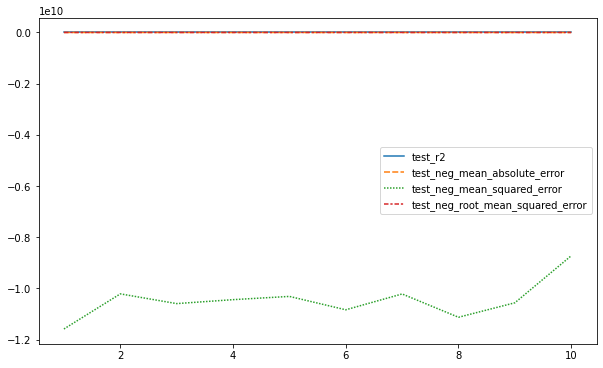

In [102]:
sns.lineplot(data=scores.iloc[:,2:])

In [103]:
eval_metrics(y_test,y_pred)

Model testing performance
-------------------------
R2_score 	: 0.9166595927563967
MAE 		: 82098.42354508385
MSE 		: 10399539218.93453
RMSE 		: 101978.13108178896


In [104]:
pd.DataFrame(scores).iloc[:,2:].mean()

test_r2                                       0.91573
test_neg_mean_absolute_error             -82324.71315
test_neg_mean_squared_error        -10460671141.49484
test_neg_root_mean_squared_error        -102216.28043
dtype: float64

In [105]:
eval_metrics(y_test, y_pred)

Model testing performance
-------------------------
R2_score 	: 0.9166595927563967
MAE 		: 82098.42354508385
MSE 		: 10399539218.93453
RMSE 		: 101978.13108178896


In [106]:
lasso_model.coef_

array([ 2.24493587e+05,  8.69357451e+04,  1.38228686e+05, -1.01993613e+04,
        1.27117271e+05,  2.70861578e+04, -1.08311221e+04, -7.99107146e+03,
       -1.31501767e+03,  2.03467374e+04,  7.24729148e+04,  3.37616022e+04,
       -3.98415095e+03, -1.76895316e+04, -3.22562624e+04,  8.79041296e+03,
       -5.78168810e+03,  1.93571865e+04,  2.28974048e+03,  2.65836511e+04,
        5.18233509e+03, -2.68846737e+04,  2.14457508e+03, -6.73591557e+03,
        2.66339722e+04, -1.01123812e+04,  1.86475968e+04, -1.08749780e+03,
       -2.17673602e+04, -1.91131458e+04,  1.91692959e+03, -5.03474186e+03,
        3.95674149e+03, -1.30084315e+04,  7.40223943e+03,  4.68637828e+04,
        3.16444209e+04, -9.78189998e+03, -2.28322124e+04, -6.66615233e+02,
        6.12999691e+02,  1.53067843e+04,  3.58520110e+03,  5.52412952e+03,
        5.24212816e+03, -2.76567891e+04, -1.00260627e+03, -2.10008353e+04,
        1.79773387e+04,  1.69334609e+03,  5.55081867e+03,  0.00000000e+00,
       -2.79572908e+03,  

In [107]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [109]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis=1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.99,lasso_coef_1
0,-2941188.97852,99909.76114,99909.76114,224493.58669
1,-18894143.53005,8410.65967,8410.65967,86935.74506
2,-2971224.15483,32443.23026,32443.23026,138228.68562
3,45716066.29054,-9621.85616,-9621.85616,-10199.36127
4,-11229236.50035,38543.97387,38543.97387,127117.27150
...,...,...,...,...
246,3225352.93695,41886.34446,41886.34446,27095.29193
247,-133550.41157,5562.15449,5562.15449,-7155.45751
248,831598.26766,-37367.56730,-37367.56730,-26483.66832
249,63958.38326,-30809.27943,-30809.27943,-4806.92693


# Best alpha for Lasso

In [110]:
alpha_space = np.linspace(0.01,1,100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [121]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv=10, max_iter=100)

In [122]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100)

In [123]:
lasso_cv_model.alpha_

1.0

In [124]:
y_train_pred = lasso_cv_model.predict(X_train)
eval_metrics(y_train,y_train_pred)

Model testing performance
-------------------------
R2_score 	: 0.918564522215636
MAE 		: 80997.3060961915
MSE 		: 10144159905.644348
RMSE 		: 100718.22032603806


In [125]:
y_pred = lasso_cv_model.predict(X_test)
eval_metrics(y_test, y_pred)

Model testing performance
-------------------------
R2_score 	: 0.9173834476420605
MAE 		: 81853.5980661642
MSE 		: 10309213799.114174
RMSE 		: 101534.2986340782


In [126]:
lasso_scores = {"lasso_cv_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                              "mae": mean_absolute_error(y_train, y_train_pred),
                              "mse": mean_squared_error(y_train, y_train_pred),
                              "R2": r2_score(y_train, y_train_pred)},
              "lasso_cv_test":{"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                              "mae": mean_absolute_error(y_test, y_pred),
                              "mse": mean_squared_error(y_test, y_pred),
                              "R2": r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,100718.22033,101534.29863
mae,80997.30610,81853.59807
mse,10144159905.64435,10309213799.11417
R2,0.91856,0.91738


In [127]:
pd.concat([mls,rs,rcs,lss,lcs],axis=1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
rmse,97653.83031,108591.04995,100246.78634,102051.52294,100246.78634,102051.52294,100438.65804,101978.13108,100718.22033,101534.29863
mae,78525.06702,86256.85206,80667.32244,82104.08674,80667.32244,82104.08674,80828.48002,82098.42355,80997.30610,81853.59807
mse,9536270574.91490,11792016129.79281,10049418171.92053,10414513334.35382,10049418171.92053,10414513334.35382,10087924029.42817,10399539218.93453,10144159905.64435,10309213799.11417
R2,0.92344,0.90550,0.91933,0.91654,0.91933,0.91654,0.91902,0.91666,0.91856,0.91738


In [128]:
lasso_cv_model.coef_

array([ 2.31682960e+05,  1.54809754e+05,  1.18912986e+05,  7.85917188e+03,
        1.41051579e+05,  6.14927857e+03, -3.08430238e+03, -4.95672853e+03,
        4.34163863e+03,  4.70049538e+03,  1.32725786e+04, -1.05379566e+02,
       -7.08470893e+02, -2.89201356e+03, -5.88643068e+03,  6.38585322e+02,
        9.89418541e+02,  1.26860500e+03,  2.61142966e+03,  5.21517468e+03,
        1.34171714e+03, -6.11120002e+03, -4.57351478e+01, -6.44272741e+02,
        2.72949285e+03,  1.87676675e+03,  2.25934476e+03,  1.23503694e+03,
       -7.40508759e+03, -2.21590883e+03, -2.34477311e+03,  2.17701756e+03,
       -2.28520447e+03,  2.39402746e+03,  1.58987345e+03,  8.55018179e+03,
        4.45925100e+03, -3.20866418e+03, -3.29376146e+03, -8.04903516e+02,
       -4.70372846e+02,  2.79992949e+03, -2.67890398e+03,  5.56964031e+02,
       -8.19262146e+02, -2.85027098e+01, -3.38167342e+02, -4.37414060e+03,
        2.87568696e+03,  4.81701745e+02,  2.15572651e+03, -7.87841668e+01,
        4.89601818e+02,  

In [130]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns=["lasso_cv_coef_1"])

In [131]:
pd.concat([lm_df, rm_df, rcm_df, lcm_df],axis=1) 

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.99,lasso_cv_coef_1
0,-2941188.97852,99909.76114,99909.76114,231682.96034
1,-18894143.53005,8410.65967,8410.65967,154809.75353
2,-2971224.15483,32443.23026,32443.23026,118912.98593
3,45716066.29054,-9621.85616,-9621.85616,7859.17188
4,-11229236.50035,38543.97387,38543.97387,141051.57867
...,...,...,...,...
246,3225352.93695,41886.34446,41886.34446,5166.31497
247,-133550.41157,5562.15449,5562.15449,-2811.44058
248,831598.26766,-37367.56730,-37367.56730,-6193.97925
249,63958.38326,-30809.27943,-30809.27943,-437.00399


# Elastik Net

In [132]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [133]:
elastic_model = ElasticNet()

In [134]:
elastic_model.fit(X_train, y_train)

ElasticNet()

In [135]:
y_train_pred = elastic_model.predict(X_train)

In [136]:
eval_metrics(y_train, y_train_pred)

Model testing performance
-------------------------
R2_score 	: 0.9036153715092975
MAE 		: 87256.36099837183
MSE 		: 12006328328.3584
RMSE 		: 109573.39242881184


In [137]:
y_pred = elastic_model.predict(X_test)

In [138]:
eval_metrics(y_test, y_pred)

Model testing performance
-------------------------
R2_score 	: 0.9020488354085195
MAE 		: 88146.9600655108
MSE 		: 12222726182.893684
RMSE 		: 110556.43890291368


In [139]:
elastic_scores = {"elastic_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                              "mae": mean_absolute_error(y_train, y_train_pred),
                              "mse": mean_squared_error(y_train, y_train_pred),
                              "R2": r2_score(y_train, y_train_pred)},
              "elastic_test":{"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                              "mae": mean_absolute_error(y_test, y_pred),
                              "mse": mean_squared_error(y_test, y_pred),
                              "R2": r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,109573.39243,110556.43890
mae,87256.36100,88146.96007
mse,12006328328.35840,12222726182.89368
R2,0.90362,0.90205


In [140]:
pd.concat([mls,rs,rcs,lss,lcs,es], axis=1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
rmse,97653.83031,108591.04995,100246.78634,102051.52294,100246.78634,102051.52294,100438.65804,101978.13108,100718.22033,101534.29863,109573.39243,110556.43890
mae,78525.06702,86256.85206,80667.32244,82104.08674,80667.32244,82104.08674,80828.48002,82098.42355,80997.30610,81853.59807,87256.36100,88146.96007
mse,9536270574.91490,11792016129.79281,10049418171.92053,10414513334.35382,10049418171.92053,10414513334.35382,10087924029.42817,10399539218.93453,10144159905.64435,10309213799.11417,12006328328.35840,12222726182.89368
R2,0.92344,0.90550,0.91933,0.91654,0.91933,0.91654,0.91902,0.91666,0.91856,0.91738,0.90362,0.90205


In [141]:
elastic_model.coef_

array([ 1.83626775e+04,  1.00085422e+04,  4.43867044e+03, -1.25284679e+03,
        8.17532729e+03,  1.43751914e+04,  1.56843080e+04,  1.30757196e+04,
        4.61719798e+03,  1.25163777e+04,  7.92181905e+03,  8.61271798e+03,
        1.92774271e+03,  8.97490705e+03,  3.25517564e+03,  4.39844193e+02,
        7.18482747e+03, -5.14376951e+02,  2.84616420e+03,  5.61972212e+03,
        1.03064640e+04,  1.20180831e+04,  1.04992191e+04,  5.17614337e+03,
        1.05198943e+04,  9.94949301e+03,  1.13621456e+04,  4.57375157e+03,
        1.01823146e+04,  7.26845123e+03,  3.43184187e+03,  9.20633281e+03,
        1.27166442e+03,  4.59582798e+03,  6.50207752e+03,  5.74031123e+03,
        6.57629506e+03,  2.04141029e+03,  6.46763804e+03,  5.08302249e+03,
        1.70749647e+03,  6.83330229e+03,  1.57846763e+01,  2.50433970e+03,
        4.61865532e+03,  1.96458495e+03,  5.67455396e+02,  4.46309653e+03,
       -3.73085023e+01,  1.95133063e+03,  4.10979224e+03, -2.17233965e+02,
        4.91906520e+02,  

In [142]:
em_df = pd.DataFrame(elastic_model.coef_,columns=["elastic_coef_(alp:1,l1:0.5)"])

In [143]:
pd.concat([lm_df, rm_df, rcm_df, lcm_df, em_df],axis=1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.99,lasso_cv_coef_1,"elastic_coef_(alp:1,l1:0.5)"
0,-2941188.97852,99909.76114,99909.76114,231682.96034,18362.67748
1,-18894143.53005,8410.65967,8410.65967,154809.75353,10008.54216
2,-2971224.15483,32443.23026,32443.23026,118912.98593,4438.67044
3,45716066.29054,-9621.85616,-9621.85616,7859.17188,-1252.84679
4,-11229236.50035,38543.97387,38543.97387,141051.57867,8175.32729
...,...,...,...,...,...
246,3225352.93695,41886.34446,41886.34446,5166.31497,552.27418
247,-133550.41157,5562.15449,5562.15449,-2811.44058,-553.93800
248,831598.26766,-37367.56730,-37367.56730,-6193.97925,-1414.32635
249,63958.38326,-30809.27943,-30809.27943,-437.00399,-1133.80186


In [145]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio= [0.1, 0.5, 0.7, 0.9, 0.95],cv=10, max_iter=100000 )

In [146]:
alpha_space= np.linspace(0.01,1,100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [151]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio= [0.1, 0.5, 0.7, 0.9, 0.95],cv=10, max_iter=100 )

In [152]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95], max_iter=100)

In [153]:
elastic_cv_model.alpha_

0.01

In [154]:
elastic_cv_model.l1_ratio_

0.1

In [155]:
elastic_cv_model.coef_

array([ 1.18136695e+05,  7.70892425e+04,  6.22867890e+04,  2.07164812e+04,
        7.68844617e+04,  8.95762945e+04,  6.64236783e+04,  3.42759101e+04,
       -1.56804297e+03,  4.68613412e+04,  3.66373770e+04,  2.94387855e+04,
       -1.85692862e+03,  2.82509842e+04,  1.00367776e+04, -2.60411153e+03,
        1.92448578e+04, -5.38872446e+03,  4.39955266e+03,  9.49954086e+03,
       -2.13153357e+04, -2.20942856e+04, -6.61748131e+03, -3.33617811e+03,
       -4.34595377e+01, -4.79973646e+03,  9.07801330e+02, -4.61519432e+02,
       -7.99045837e+03,  2.10671853e+03, -1.30594944e+03,  3.89710203e+02,
       -1.94890504e+03,  1.08468667e+03,  1.07210526e+03,  2.39426036e+03,
        4.21376140e+03, -2.09583363e+03, -3.27081419e+03, -3.74560411e+02,
       -1.41592648e+03,  1.27343373e+03, -2.31699473e+03, -4.08250715e+02,
       -6.43553294e+02, -1.94115349e+01, -3.04952768e+02, -2.08511904e+03,
        1.42061515e+03,  1.23274749e+02,  1.42979512e+03,  1.06040686e+03,
        1.68600535e+01,  

In [158]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns = ["elastic_coef_(alp:0.01, l1:0.1)"])

In [159]:
pd.concat([lm_df, rm_df, rcm_df, lcm_df, em_df, ecm_df], axis=1)

,lm_coef,ridge_coef_1,Ridge_cv_coef_0.99,lasso_cv_coef_1,"elastic_coef_(alp:1,l1:0.5)","elastic_coef_(alp:0.01, l1:0.1)"
0,-2941188.97852,99909.76114,99909.76114,231682.96034,18362.67748,118136.69488
1,-18894143.53005,8410.65967,8410.65967,154809.75353,10008.54216,77089.24247
2,-2971224.15483,32443.23026,32443.23026,118912.98593,4438.67044,62286.78903
3,45716066.29054,-9621.85616,-9621.85616,7859.17188,-1252.84679,20716.48118
4,-11229236.50035,38543.97387,38543.97387,141051.57867,8175.32729,76884.46173
...,...,...,...,...,...,...
246,3225352.93695,41886.34446,41886.34446,5166.31497,552.27418,3853.76814
247,-133550.41157,5562.15449,5562.15449,-2811.44058,-553.93800,-1741.43750
248,831598.26766,-37367.56730,-37367.56730,-6193.97925,-1414.32635,-5324.00135
249,63958.38326,-30809.27943,-30809.27943,-437.00399,-1133.80186,-746.09558


In [160]:
y_train_pred = elastic_cv_model.predict(X_train)

In [161]:
eval_metrics(y_train, y_train_pred) 

Model testing performance
-------------------------
R2_score 	: 0.9184977580733578
MAE 		: 81029.00510901466
MSE 		: 10152476503.688105
RMSE 		: 100759.4983298751


In [162]:
y_pred = elastic_cv_model.predict(X_test)

In [163]:
eval_metrics(y_test,y_pred)

Model testing performance
-------------------------
R2_score 	: 0.9173946606216188
MAE 		: 81833.83968022563
MSE 		: 10307814600.039742
RMSE 		: 101527.40812233779


In [164]:
elastic_cv_scores = {"elastic_cv_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                              "mae": mean_absolute_error(y_train, y_train_pred),
                              "mse": mean_squared_error(y_train, y_train_pred),
                              "R2": r2_score(y_train, y_train_pred)},
              "elastic_cv_test":{"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                              "mae": mean_absolute_error(y_test, y_pred),
                              "mse": mean_squared_error(y_test, y_pred),
                              "R2": r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,100759.49833,101527.40812
mae,81029.00511,81833.83968
mse,10152476503.68810,10307814600.03974
R2,0.91850,0.91739


In [165]:
pd.concat([mls,rs, rcs,lss,lcs,es, ecs],axis=1)

,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
rmse,97653.83031,108591.04995,100246.78634,102051.52294,100246.78634,102051.52294,100438.65804,101978.13108,100718.22033,101534.29863,109573.39243,110556.43890,100759.49833,101527.40812
mae,78525.06702,86256.85206,80667.32244,82104.08674,80667.32244,82104.08674,80828.48002,82098.42355,80997.30610,81853.59807,87256.36100,88146.96007,81029.00511,81833.83968
mse,9536270574.91490,11792016129.79281,10049418171.92053,10414513334.35382,10049418171.92053,10414513334.35382,10087924029.42817,10399539218.93453,10144159905.64435,10309213799.11417,12006328328.35840,12222726182.89368,10152476503.68810,10307814600.03974
R2,0.92344,0.90550,0.91933,0.91654,0.91933,0.91654,0.91902,0.91666,0.91856,0.91738,0.90362,0.90205,0.91850,0.91739


# Grid Search

In [166]:
from sklearn.model_selection import GridSearchCV

In [171]:
elastic_model = ElasticNet(max_iter = 100)

In [172]:
param_grid = {"alpha":[0.01,0.02, 0.1, 1, 5, 10, 50, 100],
             "l1_ratio": [0.1,0.5,0.7,0.9,0.95,0.99,1]}

In [1]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid=param_grid,cv=10, verbose=3)

NameError: name 'GridSearchCV' is not defined

In [174]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 56 candidates, totalling 560 fits
[CV 1/10] END ......................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV 2/10] END ......................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV 3/10] END ......................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV 4/10] END ......................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV 5/10] END ......................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV 6/10] END ......................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV 7/10] END ......................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV 8/10] END ......................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV 9/10] END ......................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV 10/10] END .....................alpha=0.01, l1_ratio=0.1; total time=   0.2s
[CV 1/10] END ......................alpha=0.01, l1_ratio=0.5; total time=   0.2s
[CV 2/10] END ......................alpha=0.01

[CV 2/10] END ......................alpha=0.02, l1_ratio=0.9; total time=   0.2s
[CV 3/10] END ......................alpha=0.02, l1_ratio=0.9; total time=   0.2s
[CV 4/10] END ......................alpha=0.02, l1_ratio=0.9; total time=   0.2s
[CV 5/10] END ......................alpha=0.02, l1_ratio=0.9; total time=   0.2s
[CV 6/10] END ......................alpha=0.02, l1_ratio=0.9; total time=   0.2s
[CV 7/10] END ......................alpha=0.02, l1_ratio=0.9; total time=   0.2s
[CV 8/10] END ......................alpha=0.02, l1_ratio=0.9; total time=   0.2s
[CV 9/10] END ......................alpha=0.02, l1_ratio=0.9; total time=   0.2s
[CV 10/10] END .....................alpha=0.02, l1_ratio=0.9; total time=   0.2s
[CV 1/10] END .....................alpha=0.02, l1_ratio=0.95; total time=   0.2s
[CV 2/10] END .....................alpha=0.02, l1_ratio=0.95; total time=   0.2s
[CV 3/10] END .....................alpha=0.02, l1_ratio=0.95; total time=   0.2s
[CV 4/10] END ..............

[CV 4/10] END .........................alpha=0.1, l1_ratio=1; total time=   0.2s
[CV 5/10] END .........................alpha=0.1, l1_ratio=1; total time=   0.2s
[CV 6/10] END .........................alpha=0.1, l1_ratio=1; total time=   0.2s
[CV 7/10] END .........................alpha=0.1, l1_ratio=1; total time=   0.2s
[CV 8/10] END .........................alpha=0.1, l1_ratio=1; total time=   0.2s
[CV 9/10] END .........................alpha=0.1, l1_ratio=1; total time=   0.2s
[CV 10/10] END ........................alpha=0.1, l1_ratio=1; total time=   0.2s
[CV 1/10] END .........................alpha=1, l1_ratio=0.1; total time=   0.2s
[CV 2/10] END .........................alpha=1, l1_ratio=0.1; total time=   0.2s
[CV 3/10] END .........................alpha=1, l1_ratio=0.1; total time=   0.2s
[CV 4/10] END .........................alpha=1, l1_ratio=0.1; total time=   0.2s
[CV 5/10] END .........................alpha=1, l1_ratio=0.1; total time=   0.2s
[CV 6/10] END ..............

[CV 6/10] END .........................alpha=5, l1_ratio=0.7; total time=   0.2s
[CV 7/10] END .........................alpha=5, l1_ratio=0.7; total time=   0.2s
[CV 8/10] END .........................alpha=5, l1_ratio=0.7; total time=   0.2s
[CV 9/10] END .........................alpha=5, l1_ratio=0.7; total time=   0.2s
[CV 10/10] END ........................alpha=5, l1_ratio=0.7; total time=   0.2s
[CV 1/10] END .........................alpha=5, l1_ratio=0.9; total time=   0.2s
[CV 2/10] END .........................alpha=5, l1_ratio=0.9; total time=   0.2s
[CV 3/10] END .........................alpha=5, l1_ratio=0.9; total time=   0.2s
[CV 4/10] END .........................alpha=5, l1_ratio=0.9; total time=   0.2s
[CV 5/10] END .........................alpha=5, l1_ratio=0.9; total time=   0.2s
[CV 6/10] END .........................alpha=5, l1_ratio=0.9; total time=   0.2s
[CV 7/10] END .........................alpha=5, l1_ratio=0.9; total time=   0.2s
[CV 8/10] END ..............

[CV 8/10] END .......................alpha=10, l1_ratio=0.99; total time=   0.2s
[CV 9/10] END .......................alpha=10, l1_ratio=0.99; total time=   0.2s
[CV 10/10] END ......................alpha=10, l1_ratio=0.99; total time=   0.2s
[CV 1/10] END ..........................alpha=10, l1_ratio=1; total time=   0.2s
[CV 2/10] END ..........................alpha=10, l1_ratio=1; total time=   0.2s
[CV 3/10] END ..........................alpha=10, l1_ratio=1; total time=   0.2s
[CV 4/10] END ..........................alpha=10, l1_ratio=1; total time=   0.2s
[CV 5/10] END ..........................alpha=10, l1_ratio=1; total time=   0.2s
[CV 6/10] END ..........................alpha=10, l1_ratio=1; total time=   0.2s
[CV 7/10] END ..........................alpha=10, l1_ratio=1; total time=   0.2s
[CV 8/10] END ..........................alpha=10, l1_ratio=1; total time=   0.2s
[CV 9/10] END ..........................alpha=10, l1_ratio=1; total time=   0.2s
[CV 10/10] END .............

[CV 1/10] END .......................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV 2/10] END .......................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV 3/10] END .......................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV 4/10] END .......................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV 5/10] END .......................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV 6/10] END .......................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV 7/10] END .......................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV 8/10] END .......................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV 9/10] END .......................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV 10/10] END ......................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV 1/10] END .......................alpha=100, l1_ratio=0.9; total time=   0.2s
[CV 2/10] END .......................alpha=100, l1_ratio=0.9; total time=   0.2s
[CV 3/10] END ..............

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100),
             param_grid={'alpha': [0.01, 0.02, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [175]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

# Best Model Grid Search

In [176]:
y_pred = grid_model.predict(X_test)

In [177]:
eval_metrics(y_test,y_pred)

Model testing performance
-------------------------
R2_score 	: 0.9178536637418064
MAE 		: 81565.33746815377
MSE 		: 10250538410.639187
RMSE 		: 101244.94264228306


In [178]:
y_train_pred = grid_model.predict(X_train)

In [179]:
eval_metrics(y_train, y_train_pred)

Model testing performance
-------------------------
R2_score 	: 0.9183614032590486
MAE 		: 81083.90315750848
MSE 		: 10169461791.647236
RMSE 		: 100843.74939304485


In [180]:
grid_scores = {"grid_train": {"rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                              "mae": mean_absolute_error(y_train, y_train_pred),
                              "mse": mean_squared_error(y_train, y_train_pred),
                              "R2": r2_score(y_train, y_train_pred)},
              "grid_test":{"rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
                              "mae": mean_absolute_error(y_test, y_pred),
                              "mse": mean_squared_error(y_test, y_pred),
                              "R2": r2_score(y_test, y_pred)}}
gs = pd.DataFrame(grid_scores)
gs

,grid_train,grid_test
rmse,100843.74939,101244.94264
mae,81083.90316,81565.33747
mse,10169461791.64724,10250538410.63919
R2,0.91836,0.91785


In [208]:
pd.concat([ls,mls,rs, rcs,lss,lcs,es, ecs,gs],axis=1)

,slm_train,slm_test,lm_train,lm_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,grid_train,grid_test
rmse,196342.38008,194788.29539,97653.83031,108591.04995,100246.78634,102051.52294,100246.78634,102051.52294,100438.65804,101978.13108,100718.22033,101534.29863,109573.39243,110556.43890,100759.49833,101527.40812,100843.74939,101244.94264
mae,158295.41434,155674.96396,78525.06702,86256.85206,80667.32244,82104.08674,80667.32244,82104.08674,80828.48002,82098.42355,80997.30610,81853.59807,87256.36100,88146.96007,81029.00511,81833.83968,81083.90316,81565.33747
mse,38550330214.66680,37942480019.09532,9536270574.91490,11792016129.79281,10049418171.92053,10414513334.35382,10049418171.92053,10414513334.35382,10087924029.42817,10399539218.93453,10144159905.64435,10309213799.11417,12006328328.35840,12222726182.89368,10152476503.68810,10307814600.03974,10169461791.64724,10250538410.63919
R2,0.69052,0.69593,0.92344,0.90550,0.91933,0.91654,0.91933,0.91654,0.91902,0.91666,0.91856,0.91738,0.90362,0.90205,0.91850,0.91739,0.91836,0.91785
